In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp

Завдання 1

In [7]:
num_points = 500

class1_x = np.random.normal(2, 1, num_points)
class1_y = np.random.normal(2, 1, num_points)

class2_x = np.random.normal(-2, 1, num_points)
class2_y = np.random.normal(-2, 1, num_points)
x1 = np.concatenate([class1_x, class2_x])
x2 = np.concatenate([class1_y, class2_y])

labels = np.concatenate([np.zeros(num_points), np.ones(num_points)])

df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'label': labels
})

df.to_csv('dataset1.csv', index=False)

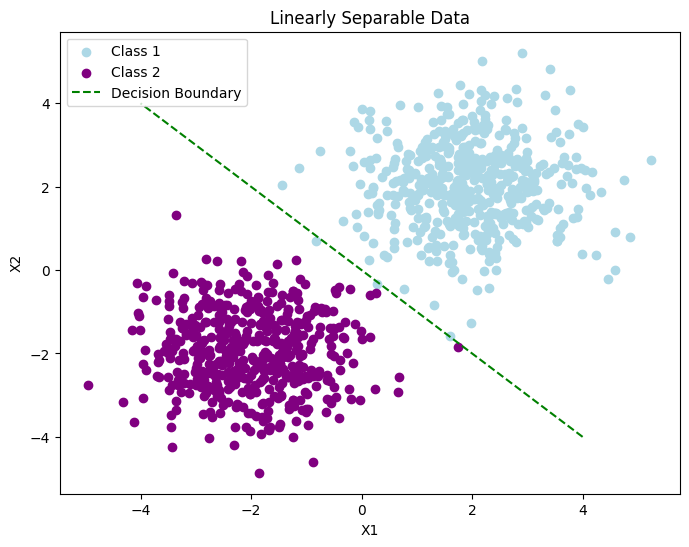

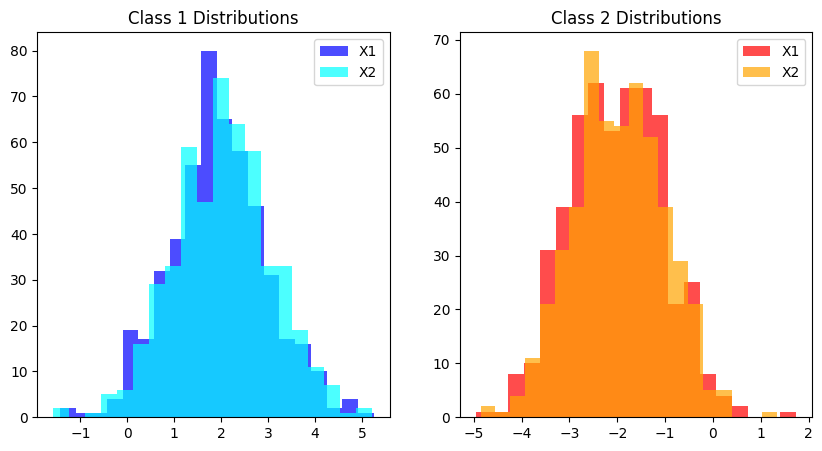

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(class1_x, class1_y, color='lightblue', label='Class 1')
plt.scatter(class2_x, class2_y, color='purple', label='Class 2')

x_vals = np.linspace(4, -4, 100)
y_vals = -x_vals
plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(class1_x, bins=20, alpha=0.7, label='X1', color='blue')
plt.hist(class1_y, bins=20, alpha=0.7, label='X2', color='cyan')
plt.title('Class 1 Distributions')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(class2_x, bins=20, alpha=0.7, label='X1', color='red')
plt.hist(class2_y, bins=20, alpha=0.7, label='X2', color='orange')
plt.title('Class 2 Distributions')
plt.legend()


висновок

У цьому завданні ми використали нормальний розподіл для створення точок навколо центроїдів кожного класу. Додавання шуму до даних дозволило зробити їх більш реалістичними. Завдяки цьому класи залишаються лінійно роздільними, що дозволяє провести між ними пряму лінію без помилок. Такий підхід забезпечує ідеальний набір даних для навчання моделей класифікації, зокрема лінійних класифікаторів.

Завдання 2

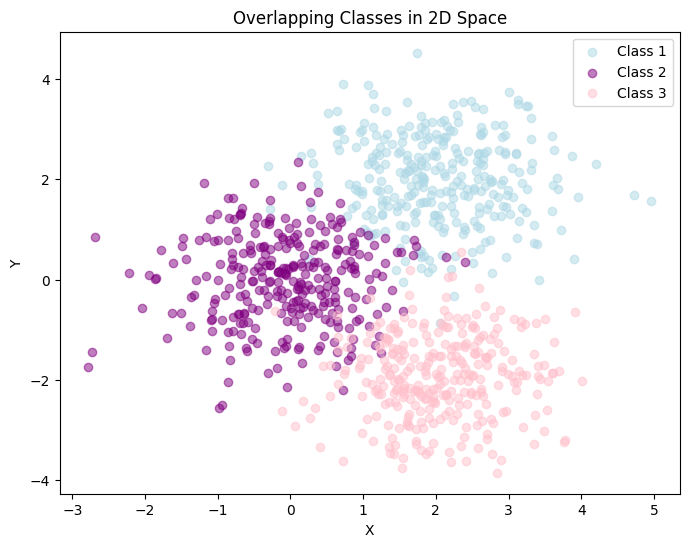

In [14]:
num_points = 300

class1_x = np.random.normal(2, 0.85, num_points)
class1_y = np.random.normal(2, 0.85, num_points)

class2_x = np.random.normal(0, 0.85, num_points)
class2_y = np.random.normal(0, 0.85, num_points)

class3_x = np.random.normal(2, 0.85, num_points)
class3_y = np.random.normal(-2, 0.85, num_points)

x = np.concatenate([class1_x, class2_x, class3_x])
y = np.concatenate([class1_y, class2_y, class3_y])
labels = np.concatenate([np.ones(num_points), np.ones(num_points)*2, np.ones(num_points)*3])

df = pd.DataFrame({
    'x': x,
    'y': y,
    'class': labels
})

df.to_csv('dataset2.csv', index=False)

plt.figure(figsize=(8, 6))
plt.scatter(class1_x, class1_y, color='lightblue', label='Class 1', alpha=0.5)
plt.scatter(class2_x, class2_y, color='purple', label='Class 2', alpha=0.5)
plt.scatter(class3_x, class3_y, color='pink', label='Class 3', alpha=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Overlapping Classes in 2D Space')
plt.legend()
plt.show()

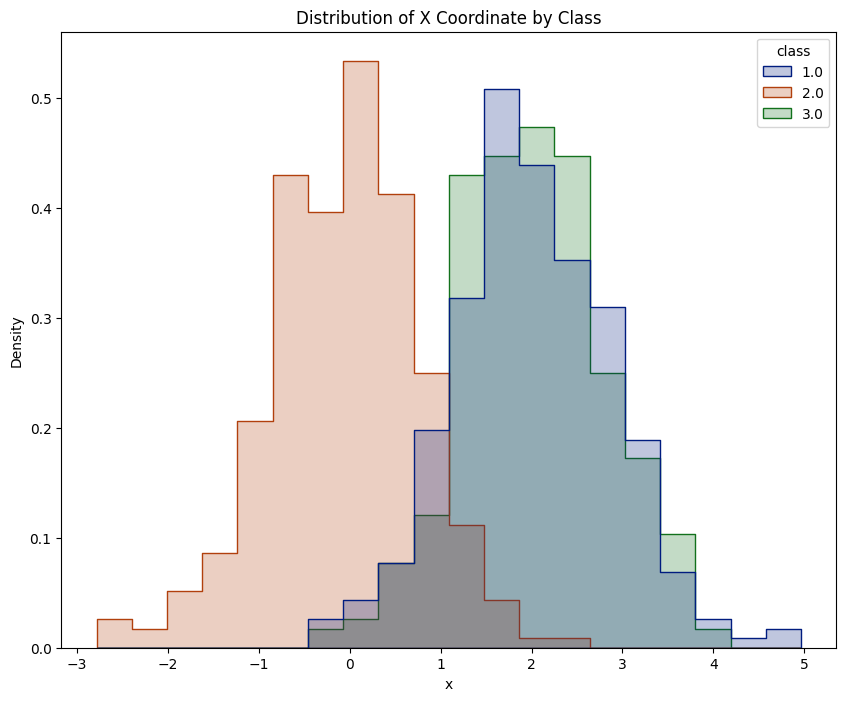

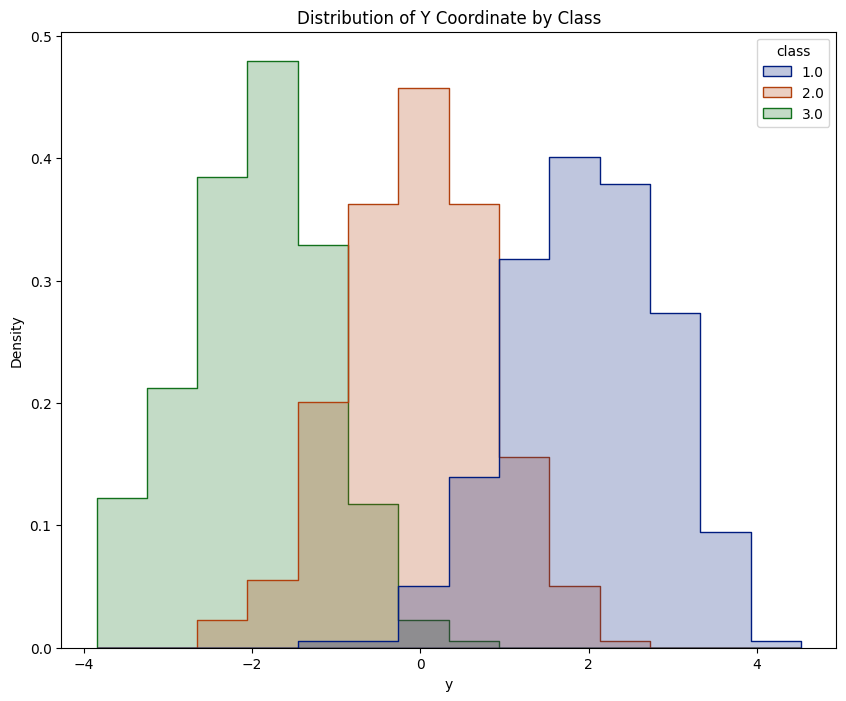

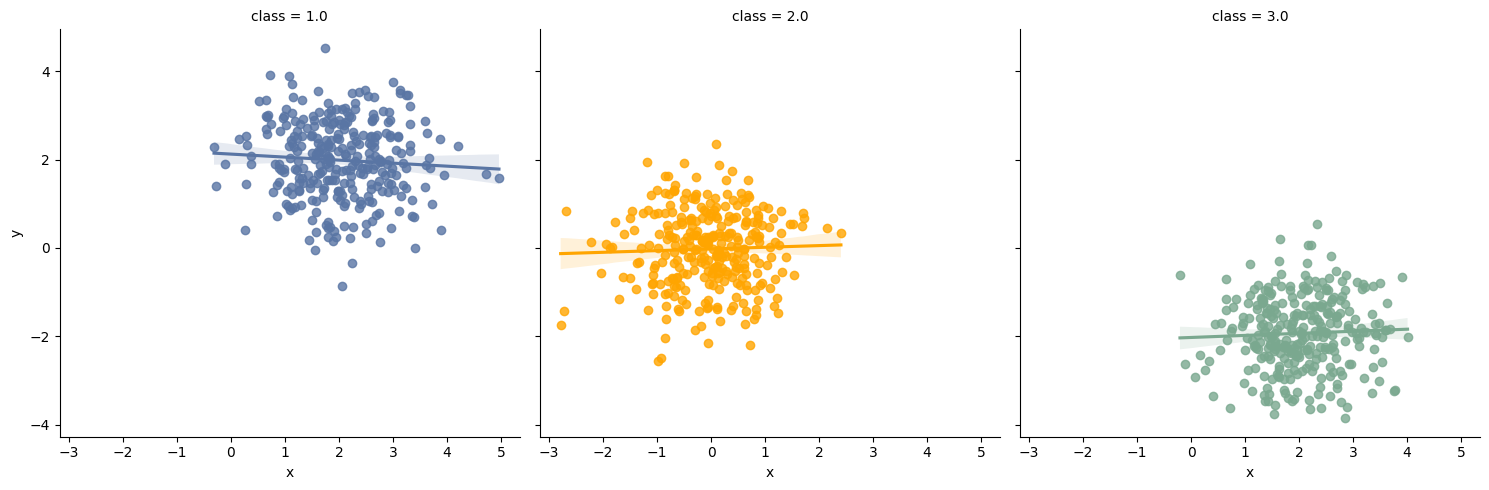

In [19]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='x', hue='class', element='step', palette='dark', stat='density', common_norm=False)
plt.title('Distribution of X Coordinate by Class')

plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='y', hue='class', element='step', palette='dark', stat='density', common_norm=False)
plt.title('Distribution of Y Coordinate by Class')

sns.lmplot(x="x", y="y", col="class", hue="class", data=df, col_wrap=3, height=5, palette=["#5975A4", "orange", "#7AA88F"])
plt.show()

Висновок
Центроїди класів були розташовані таким чином, щоб забезпечити часткове перекриття. Стандартне відхилення було вибране з метою збільшення змішуваності точок, що робить класифікацію більш складною. Ми побудували графіки, що показують розподіл точок у двовимірному просторі та підтверджують наявність перекриття між класами. Це важливо для задач класифікації, де класи можуть бути важко відокремити один від одного. Цей набір даних ідеально підходить для задач, де потрібно тестувати моделі класифікації на даних з частковим перекриттям між класами. Це забезпечує складніші умови для класифікації, які більш наближені до реальних ситуацій.

Завдання 3

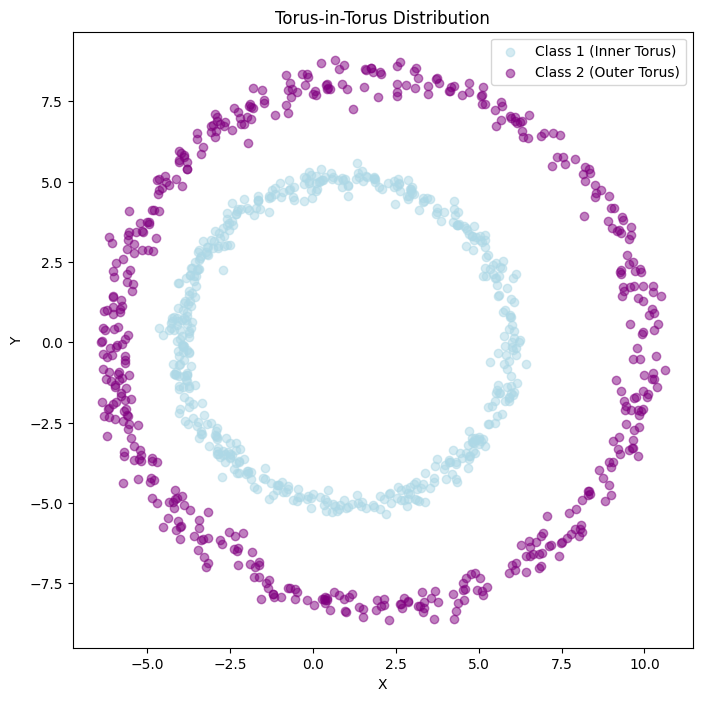

In [20]:
num_points = 500

R1, r1 = 5, 1
theta1 = np.random.uniform(0, 2 * np.pi, num_points)
x1 = (R1 + r1 * np.cos(theta1)) * np.cos(theta1) + np.random.normal(0, 0.2, num_points)
y1 = (R1 + r1 * np.cos(theta1)) * np.sin(theta1) + np.random.normal(0, 0.2, num_points)

R2, r2 = 8, 2
theta2 = np.random.uniform(0, 2 * np.pi, num_points)
x2 = (R2 + r2 * np.cos(theta2)) * np.cos(theta2) + np.random.normal(0, 0.3, num_points)
y2 = (R2 + r2 * np.cos(theta2)) * np.sin(theta2) + np.random.normal(0, 0.3, num_points)

x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
labels = np.concatenate([np.ones(num_points), np.ones(num_points)*2])

df = pd.DataFrame({
    'x': x,
    'y': y,
    'class': labels
})

df.to_csv('dataset3.csv', index=False)

plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, color='lightblue', label='Class 1 (Inner Torus)', alpha=0.5)
plt.scatter(x2, y2, color='purple', label='Class 2 (Outer Torus)', alpha=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Torus-in-Torus Distribution')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

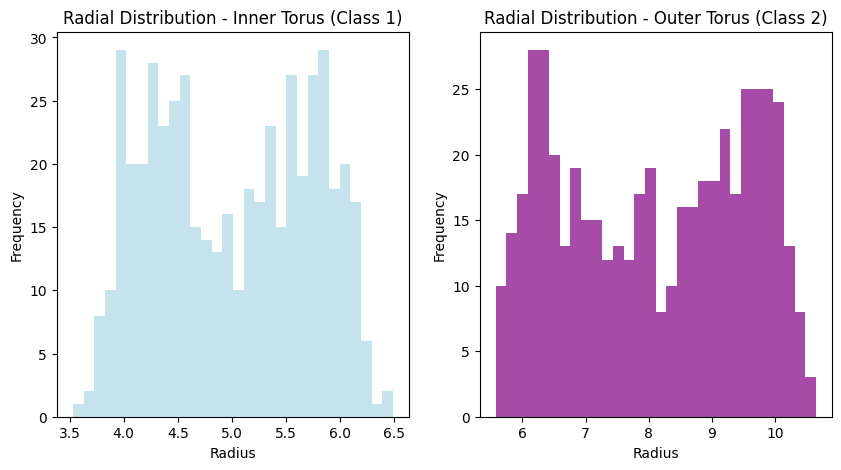

In [22]:
r1_dist = np.sqrt(x1**2 + y1**2)
r2_dist = np.sqrt(x2**2 + y2**2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(r1_dist, bins=30, color='lightblue', alpha=0.7)
plt.title('Radial Distribution - Inner Torus (Class 1)')
plt.xlabel('Radius')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(r2_dist, bins=30, color='purple', alpha=0.7)
plt.title('Radial Distribution - Outer Torus (Class 2)')
plt.xlabel('Radius')
plt.ylabel('Frequency')

Висновок
Згенеровані дані представляють дві множини у формі "тор в торі". Внутрішній тор належить до класу 1, а зовнішній тор — до класу 2. Доданий шум робить ці дані більш реалістичними, зберігаючи при цьому чітке розділення між класами. Цей набір даних є чудовим прикладом для задач класифікації з нелінійним розділенням класів.

Завдання 4

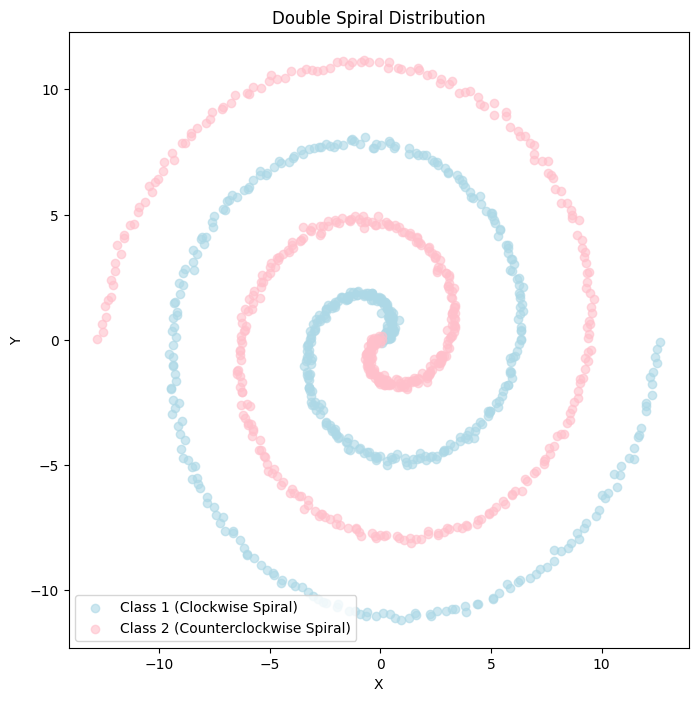

In [23]:
num_points = 500


theta = np.linspace(0, 4 * np.pi, num_points)
r = theta

x1 = r * np.cos(theta) + np.random.normal(0, 0.1, num_points)
y1 = r * np.sin(theta) + np.random.normal(0, 0.1, num_points)

x2 = -r * np.cos(theta) + np.random.normal(0, 0.1, num_points)
y2 = -r * np.sin(theta) + np.random.normal(0, 0.1, num_points)

x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
labels = np.concatenate([np.ones(num_points), np.ones(num_points)*2])

df = pd.DataFrame({
    'x': x,
    'y': y,
    'class': labels
})

df.to_csv('dataset4.csv', index=False)

plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, color='lightblue', label='Class 1 (Clockwise Spiral)', alpha=0.6)
plt.scatter(x2, y2, color='pink', label='Class 2 (Counterclockwise Spiral)', alpha=0.6)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Double Spiral Distribution')
plt.legend()
plt.show()

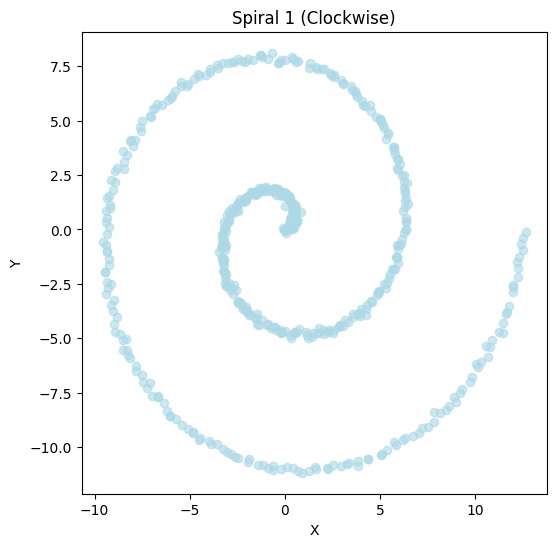

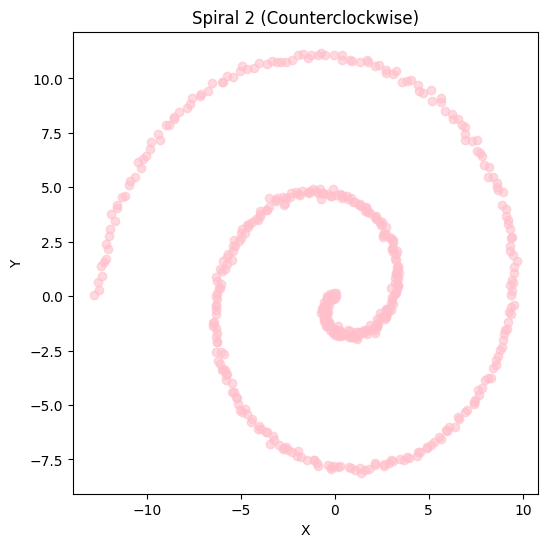

In [27]:
plt.figure(figsize=(6, 6))
plt.scatter(x1, y1, color='lightblue', alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spiral 1 (Clockwise)')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(x2, y2, color='pink', alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spiral 2 (Counterclockwise)')
plt.show()

Висновок
Це завдання забезпечує чудовий приклад даних для тестування моделей класифікації, оскільки лінійний класифікатор не зможе розділити ці дві спіралі без помилок.Ми використовували радіус, що пропорційно збільшується разом із кутом (θ), щоб утворити спіраль. Це забезпечує рівномірне розміщення точок вздовж спіралі.
Спіраль 1 закручується за годинниковою стрілкою: для цього ми використовуємо параметри
x1=r⋅cos(θ) і 𝑦1=𝑟⋅sin⁡(𝜃).
Спіраль 2 закручується проти годинникової стрілки: для цього ми змінюємо знак у виразах для x та y.
Окремі графіки дають можливість побачити кожну спіраль окремо, що допомагає краще зрозуміти структуру даних та їх закручування.

Завдання 5

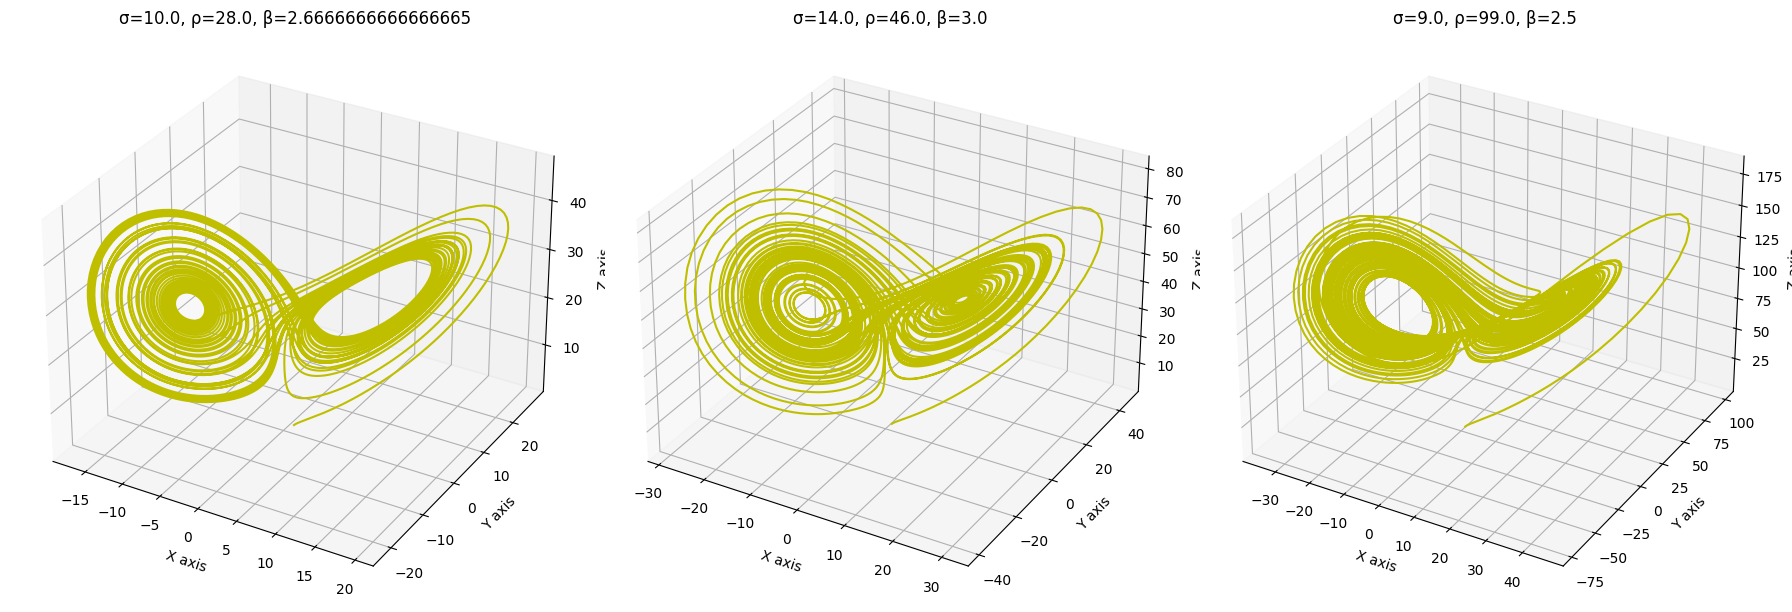

In [31]:
def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

parameters = [
    (10.0, 28.0, 8/3),   # класичні параметри Лоренца
    (14.0, 46.0, 3.0),   # більш хаотичний режим
    (9.0, 99.0, 2.5)     # режим з великою різницею температур
]

initial_state = [1.0, 1.0, 1.0]

t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

fig = plt.figure(figsize=(18, 6))

for i, (sigma, rho, beta) in enumerate(parameters):
    solution = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval)
    x, y, z = solution.y

    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.plot(x, y, z, color='y')
    ax.set_title(f'σ={sigma}, ρ={rho}, β={beta}')
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")

plt.tight_layout()
plt.show()

Висновок
Підвищена інтенсивність конвекції (σ=14, ρ=46, β=3):

Збільшення ρ і σ веде до більш хаотичної поведінки, з великими коливаннями між режимами, що робить траєкторії складнішими.
Збільшення різниці температур (σ=9, ρ=99, β=2.5):

Сильне збільшення ρ створює ще більш хаотичні траєкторії, з різко вираженими переходами між різними режимами.
Висновок:
Згенеровані траєкторії системи Лоренца чітко демонструють вплив параметрів на динаміку системи. Зміна σ, ρ та β дозволяє перейти від більш стабільних до хаотичних режимів, що відображається на тривимірних траєкторіях. Такий підхід допомагає зрозуміти, як невеликі зміни в параметрах можуть призвести до різко відмінної поведінки системи, що є ключовим у вивченні хаотичних систем.